### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.


## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [425]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [426]:
# your code
print('Hello world')

Hello world


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [427]:
%pylab inline
# import almost all we need
import pandas as pd
import numpy as np


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Vexrina\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [428]:
# your code
data = pd.read_csv('./csv/second_lab.csv')
# id заказа, количество, название предмета, описание(?), цена
print(data.count()[0])
data.head(1) 

4622


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [429]:
print(data.count()['order_id'])
print(data.nunique()['item_name'])

4622
50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [430]:
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [431]:
data['choice_description'].head(10)#list fith str

0                                                  NaN
1                                         [Clementine]
2                                              [Apple]
3                                                  NaN
4    [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
5    [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
6                                                  NaN
7    [Tomatillo Red Chili Salsa, [Fajita Vegetables...
8    [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...
9    [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...
Name: choice_description, dtype: object

In [432]:
data = data.fillna('')

In [433]:
print(data.isnull().sum())

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [434]:
print('old df')
print(data.info())
newprices = list(lambda x = x: float(x[1:-1]) for x in data['item_price'])
data.loc[:,'price_$'] = list(newprice() for newprice in newprices)
# print(data.head(5))
print('new df')
print(data.info())

old df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
new df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  4622 non-null   object 
 4   item_price          4622 non-null   object 
 5   price_$             4622 non-null

Какая средняя/минимальная/максимальная цена у товара? 

In [435]:
data['price_$'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: price_$, dtype: float64

Удалите старую колонку с ценой.

In [436]:
data = data.drop('item_price', axis=1)
data.head(5)

,order_id,quantity,item_name,choice_description,price_$
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [437]:
df = data.drop_duplicates('choice_description').copy()
df['single_item_price'] = df['price_$']/df['quantity']
print(df.sort_values(by='single_item_price')['choice_description'].head(5))
print(df.sort_values(by='single_item_price')['choice_description'].tail(5))

51        [Mountain Dew]
162          [Diet Coke]
126          [Coca Cola]
28          [Dr. Pepper]
117    [Diet Dr. Pepper]
Name: choice_description, dtype: object
1159    [Fresh Tomato Salsa, [Rice, Fajita Vegetables,...
3350    [Fresh Tomato Salsa, [Cheese, Guacamole, Lettu...
2740    [Fresh Tomato Salsa, [Fajita Vegetables, Black...
1132    [Fresh Tomato Salsa, [Rice, Black Beans, Chees...
1571    [Fresh Tomato Salsa, [Fajita Vegetables, Sour ...
Name: choice_description, dtype: object


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [438]:
data[(data['item_name']=='Chicken Bowl') & (data['quantity']>1)].count()['order_id']

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [439]:
print('avg price of each order')
print(data.groupby('order_id').mean()[['price_$']])
print('avg price of all orders')
print(round(data['price_$'].mean(),2))
print('avg quantity of each order')
print(data.groupby('order_id').mean()[['quantity']])
print('avg quantity of all orders')
print(round(data['quantity'].mean(),2))

avg price of each order
            price_$
order_id           
1          2.890000
2         16.980000
3          6.335000
4         10.500000
5          6.850000
...             ...
1830      11.500000
1831       4.300000
1832       6.600000
1833      11.750000
1834       9.583333

[1834 rows x 1 columns]
avg price of all orders
7.46
avg quantity of each order
          quantity
order_id          
1              1.0
2              2.0
3              1.0
4              1.0
5              1.0
...            ...
1830           1.0
1831           1.0
1832           1.0
1833           1.0
1834           1.0

[1834 rows x 1 columns]
avg quantity of all orders
1.08


C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\2710884167.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('order_id').mean()[['price_$']])
C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\2710884167.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('order_id').mean()[['quantity']])


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [440]:
temp = data.groupby('order_id').sum('quantity').copy()
temp[(temp['quantity']==1)].count()['quantity']

56

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [441]:
temp = data.groupby('item_name').count().sort_values(by='quantity').copy()
temp.tail(5)

,order_id,quantity,choice_description,price_$
item_name,,,,
Canned Soft Drink,301,301,301,301
Steak Burrito,368,368,368,368
Chips and Guacamole,479,479,479,479
Chicken Burrito,553,553,553,553
Chicken Bowl,726,726,726,726


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [442]:
newdata = np.random.rand(10, 3)
# print(data)
df = pd.DataFrame(newdata, columns=['index', 'column1', 'column2'])
df.set_index('index')
# your code

,column1,column2
index,,
0.473041,0.656735,0.629276
0.641332,0.764375,0.170359
0.006278,0.031758,0.089372
0.616239,0.623362,0.392189
0.505967,0.607888,0.254768
0.891142,0.677391,0.307071
0.637911,0.520123,0.067930
0.275679,0.654338,0.662919
0.927056,0.974375,0.755074


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [443]:
# your code
df.to_csv('my_df.csv', encoding='utf-8', header=False, index=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

In [444]:
%matplotlib inline
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [445]:
import datetime
import random
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(data.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
data['date'] = data.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\1895513196.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_price = data.groupby('order_id').sum()['price_$']
C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\1895513196.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price   = data.groupby('item_name').mean()['price_$']


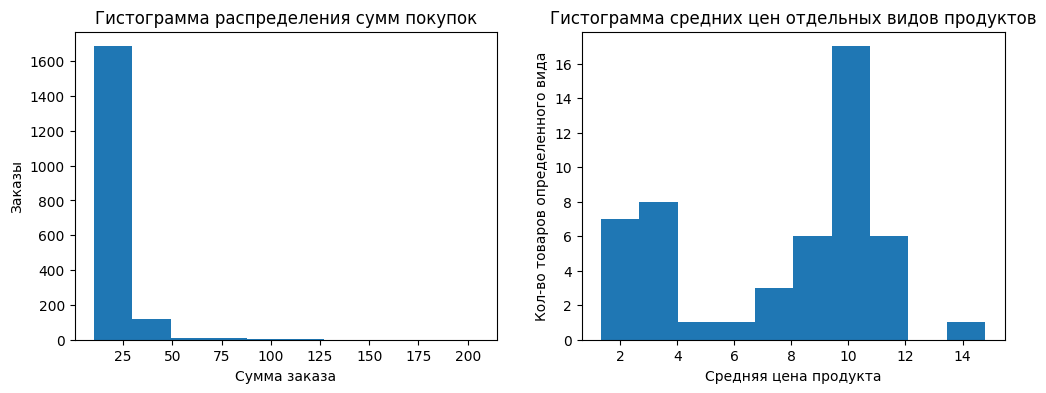

In [446]:
# your code
order_price = data.groupby('order_id').sum()['price_$']
avg_price   = data.groupby('item_name').mean()['price_$']
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes1.hist(order_price)
axes1.set_title('Гистограмма распределения сумм покупок')
axes1.set_xlabel('Сумма заказа')
axes1.set_ylabel('Заказы') 

axes2.hist(avg_price)
axes2.set_title('Гистограмма средних цен отдельных видов продуктов')
axes2.set_xlabel('Средняя цена продукта')
axes2.set_ylabel('Кол-во товаров определенного вида') 

plt.show()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\1391895376.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_price= data.groupby('date').sum()['price_$']


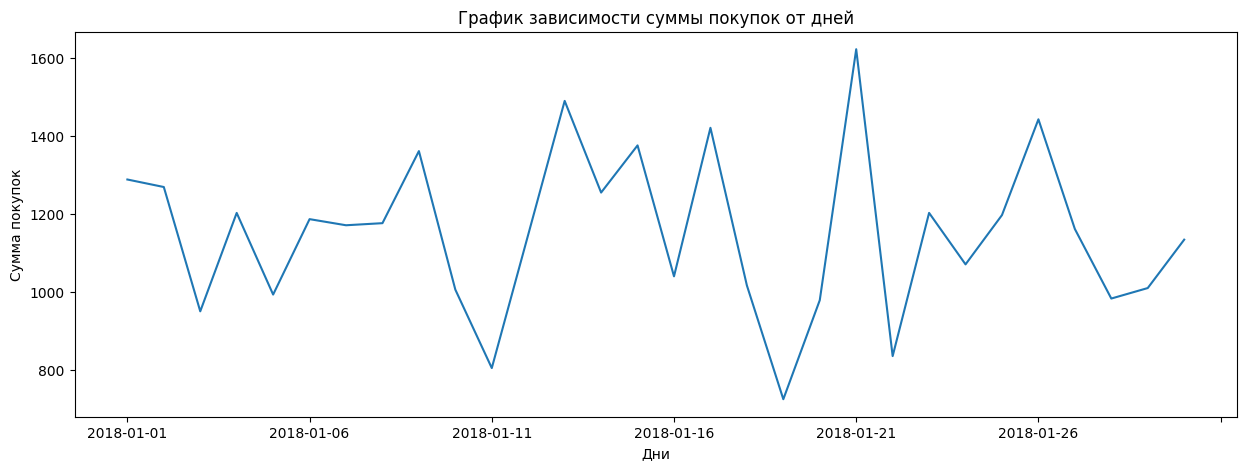

In [447]:
# your code
order_price= data.groupby('date').sum()['price_$']
plt.figure(figsize=(15,5))
order_price.plot()
plt.title('График зависимости суммы покупок от дней')
plt.xlabel('Дни')
plt.ylabel('Сумма покупок') 
plt.show()

#### 3. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\1303669439.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = data.groupby('order_id').sum()['quantity']
C:\Users\Vexrina\AppData\Local\Temp\ipykernel_1696\1303669439.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_item = data.groupby('order_id').sum()['price_$']


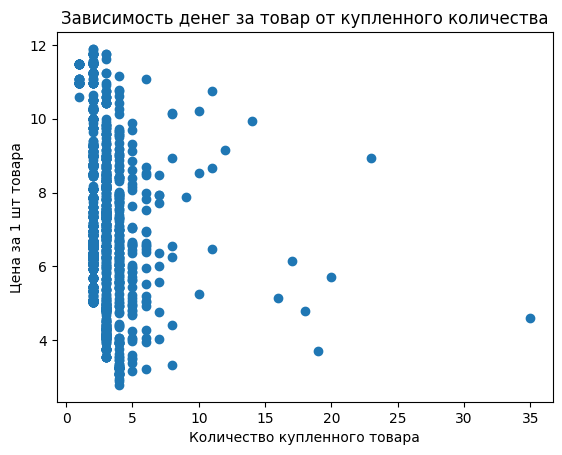

In [448]:
# your code
quantity = data.groupby('order_id').sum()['quantity']
price_item = data.groupby('order_id').sum()['price_$']
avg_item=price_item/quantity


plt.scatter(quantity, avg_item)
plt.title('Зависимость денег за товар от купленного количества')
plt.xlabel('Количество купленного товара')
plt.ylabel('Цена за 1 шт товара')
plt.show() 

Сохраните график в формате pdf (так он останется векторизованным).

In [449]:
# your code
fig.savefig('scatter.pdf')

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 